## Logarithmic Decrement Method

### Generate a damped SDOF system response

#### Import Necessary Packages and Functions

In [1]:
import numpy as np
from numpy import sqrt
from numpy import pi
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

#### Set Variable Values for System (beginning with an assumed damping ratio value)

In [2]:
xi = 0.01 #damping ratio - use decimal not percentage
m = 50 #mass
k = 51.5 #stiffness
wn = sqrt(k/m)
c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
wd = wn*sqrt(1.0-xi**2.0)

#### Establish Initial Conditions

In [3]:
F0=0 #no forcing function in free vibration
x0=2 #initial displacement
v0=0 # initial velocity

#### Setup Sampling Protocol

In [4]:
T1=100 #duration of motion evaluation
deltaT=0.02 #time step
N=T1/deltaT #total number of time points
t=np.arange(0.0,T1,deltaT) #generate time vector
x = []
v = []
X = []
for ti in t:
  x = (np.exp(-xi*wn*ti))*((x0)*np.cos(wd*ti)+((v0+xi*wn*x0)/wd)*np.sin(wd*ti))
  X.append(x)
d = np.array(X)

### Logarthmic Decrement Based on Damped SDOF System Reponse

#### Identify Peaks for Use in Log Decrement

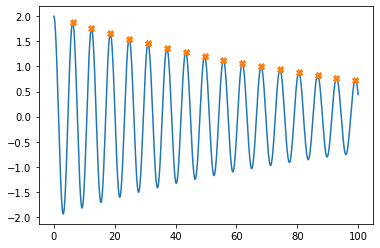

In [5]:
peaks, peak_heights = find_peaks(d, height=0) #peaks=index of peaks, peak_heights=amplitude of peaks
plt.plot(t,d)
plt.plot(t[peaks], d[peaks], "X")
peakheights = np.array(peak_heights)
plt.show()

#### Two techniques for sampling peaks for log decrement

#### First period estimate: 

In [6]:
delta = np.log(d[peaks[0]]/d[peaks[1]])
print(delta)

0.06279972750632583


#### Multi period estimate:

In [7]:
delta1 = (np.log(d[peaks[0]]/d[peaks[5]]))/5

print(delta1)

0.06283365016305578


#### Determine damping ratio assuming a small value

In [8]:
xi1=delta1/(2*pi)
print(xi1)

0.010000286015957203


#### Compare output value to the assumed damping ratio in the Variable code block above (xi=xi1)

In [9]:
print("The assumed damping ratio, " + str(xi) + ", is closely aligned to the estimated damping ratio, " + str(xi1) + ".")

The assumed damping ratio, 0.01, is closely aligned to the estimated damping ratio, 0.010000286015957203.
